<a href="https://colab.research.google.com/github/vidjaydas/Data_Science_Python/blob/main/EDA1_Data_clean_Co_relation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_profiling
!pip install sweetviz

In [41]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
#import sweetviz as sv

In [2]:
data1 = pd.read_csv("/content/data_clean.csv", index_col=0)

In [3]:
data1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [ ]:
data1['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

In [ ]:
data1.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [ ]:
data1.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [ ]:
data1.shape

(158, 9)

#Data type conversion

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [4]:
data2 = data1

In [5]:
# The method .copy() is used here so that any change made in the new DetaFrame dont get reflected in the original one
data = data2.copy()

In [6]:
data['Month'] = pd.to_numeric(data['Month'], errors= 'coerce')
data['Temp C'] = pd.to_numeric(data['Temp C'], errors= 'coerce')
data['Weather'] = data['Weather'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


# Duplicates

In [7]:
# Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [8]:
#print the duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [9]:
data_cleaned1 = data.drop_duplicates()

In [10]:
data_cleaned1.shape

(157, 9)

# Drop Columns

In [11]:
# Temp C and Temp column data are same, we will drop Temp C column from the dataset
data_cleaned2 = data_cleaned1.drop('Temp C', axis=1)

In [ ]:
data_cleaned2.shape

(157, 8)

In [ ]:
data_cleaned2.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S


# Rename the columns

In [12]:
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [13]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# Outlier Detection

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

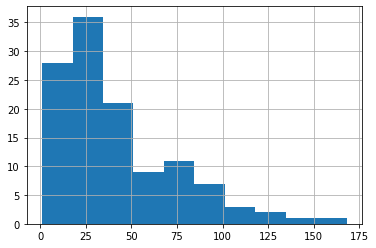

In [ ]:
# Histogram of Ozone
data_cleaned3['Ozone'].hist()  # datapoints from 125 to 175 are outliers

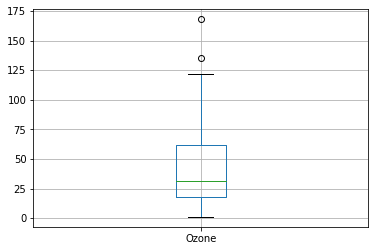

In [ ]:
# Boxplot of Ozone
data_cleaned3.boxplot(column=['Ozone'])

In [ ]:
# Descriptive Stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

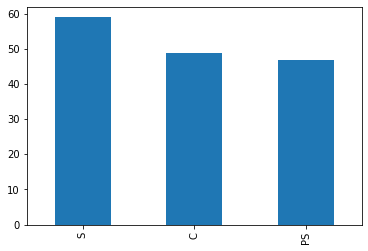

In [ ]:
# Barplot
data['Weather'].value_counts().plot.bar()

#Missing Values and Imputation

In [15]:
import seaborn as sns
cols= data_cleaned3.columns

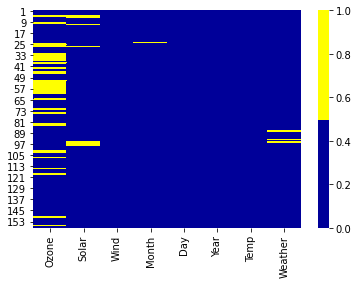

In [ ]:
colours = ['#000099', '#ffff00']
sns.heatmap(data_cleaned3[cols].isnull(),cmap=sns.color_palette(colours))

In [16]:
data_cleaned3[data_cleaned3.isnull(). any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14.3,5.0,5,2010,56,S
6,28.0,NaN,14.9,5.0,6,2010,66,C
10,NaN,194.0,8.6,5.0,10,2010,69,S
11,7.0,NaN,6.9,5.0,11,2010,74,C
24,32.0,92.0,12.0,NaN,24,2010,61,C


In [17]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [18]:
#Mean Imputation
mean = data_cleaned3['Ozone'].mean()
print(mean)

41.81512605042017


In [19]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)

In [ ]:
data_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   Solar    150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 10.1 KB


In [20]:
# Missing value imputation for categorical value
#Get the object columns
obj_columns = data_cleaned3[['Weather']]

In [21]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [22]:
obj_columns = obj_columns.fillna(obj_columns.mode().iloc[0])

In [23]:
data_cleaned3.iloc[0]

Ozone        41
Solar       190
Wind        7.4
Month         5
Day           1
Year       2010
Temp         67
Weather       S
Name: 1, dtype: object

In [24]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [ ]:
data_cleaned3.shape

(157, 8)

In [ ]:
obj_columns.shape

(157, 1)

In [25]:
# Join the data Set with imputed object dataset
data_cleaned4 = pd.concat([data_cleaned3,obj_columns], axis=1)

In [28]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S,S


In [ ]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

In [ ]:
data_cleaned4.iloc[:,-2]

1       S
2       C
3      PS
4       S
5       S
       ..
153     S
154     C
155    PS
156     S
158     C
Name: Weather, Length: 157, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [ ]:
data_cleaned4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   Solar    150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
 8   Weather  157 non-null    category
dtypes: category(2), float64(4), int64(3)
memory usage: 10.3 KB


In [ ]:
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [ ]:
data_cleaned4.Weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Weather  154 non-null    category
 1   Weather  157 non-null    category
dtypes: category(2)
memory usage: 1.7 KB


In [ ]:
data_cleaned4.iloc[:,-1:]

In [57]:
data_cleaned4['Weath'] = data_cleaned4.iloc[:,-1:]

In [65]:
data_cleaned4.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather,Weath
1,41.000000,190.0,7.4,5.0,1,2010,67,S,S,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C,C,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS,PS,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S,S,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S,S,S


In [ ]:
data_cleaned4.info()

In [68]:
data_weath = data_cleaned4.drop("Weather", axis=1)

In [69]:
data_weath.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weath
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S


In [70]:
data_weath.rename({'Weath': 'Weather'},axis=1)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S


#Scatter plot and correlation analysis

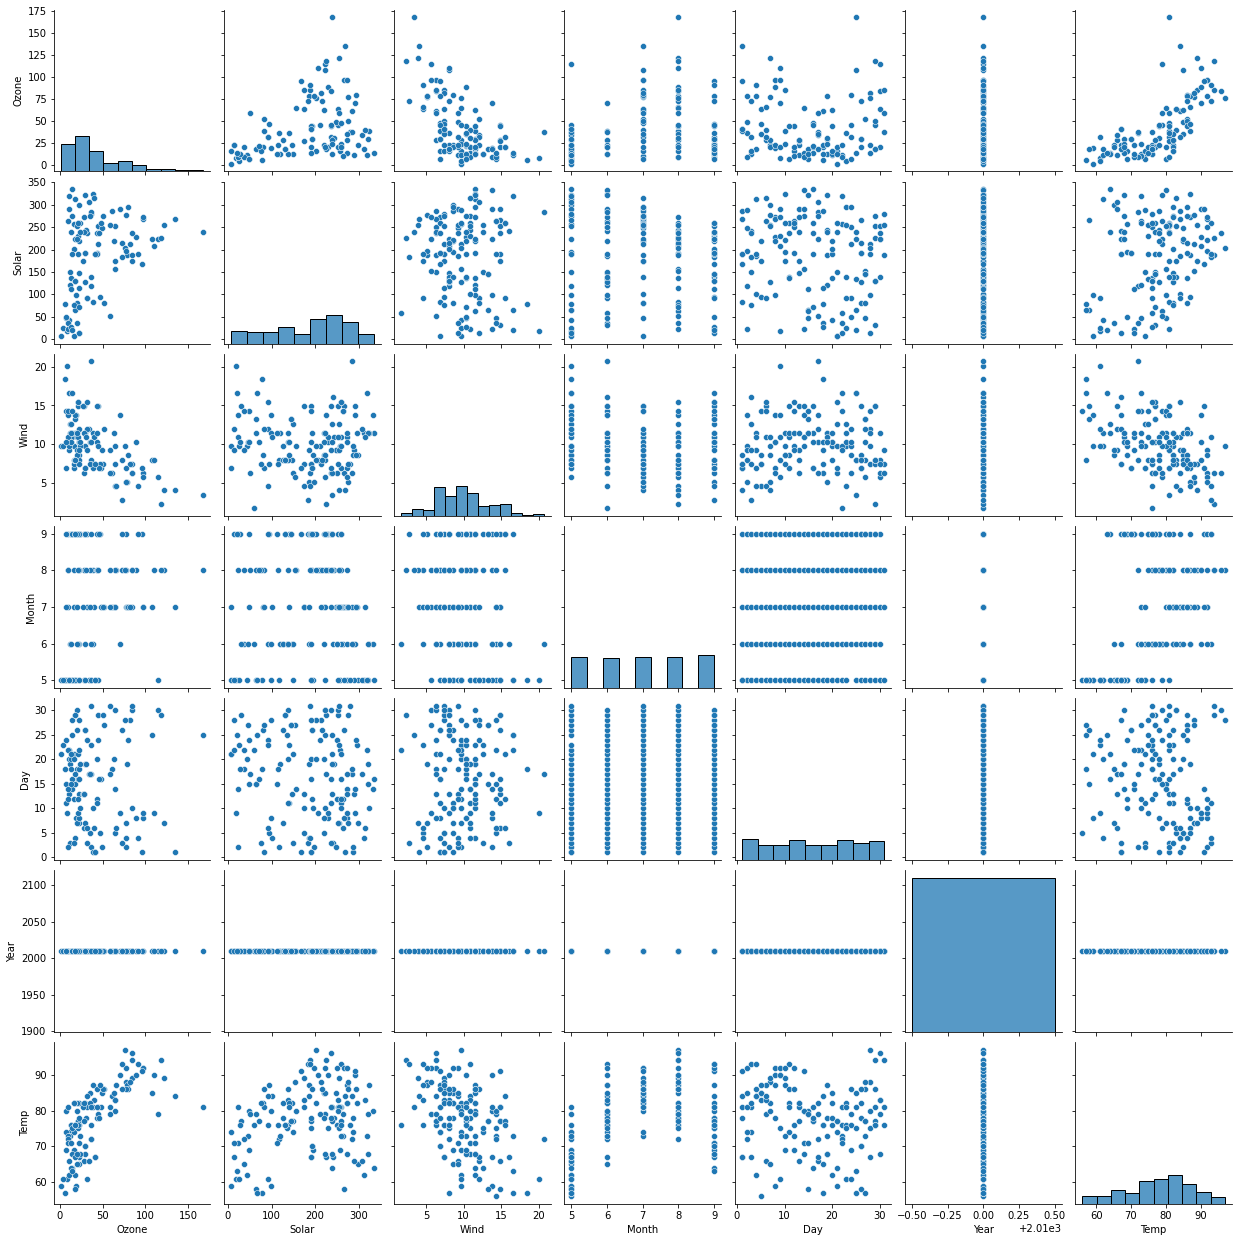

In [ ]:
# Seaborn visualization library
import seaborn as sns

# Create the default pairplot
sns.pairplot(data_cleaned3)

In [ ]:
#Correlation
data_cleaned3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.350274,-0.590270,0.147231,-0.025465,NaN,0.694404
Solar,0.350274,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.590270,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.147231,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.025465,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.694404,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


#Transformations

##Dummy Variable

In [ ]:
# Creating dummy variable for Weather column
data_cleaned4= pd.get_dummies(data, columns=['Weather'])   #Category column splited into 1 and 0

In [ ]:
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,0,0,1
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


In [ ]:
data_cleaned4 = data_cleaned4.dropna()

In [ ]:
data_cleaned4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 1 to 158
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ozone       114 non-null    float64
 1   Solar.R     114 non-null    float64
 2   Wind        114 non-null    float64
 3   Temp C      114 non-null    float64
 4   Month       114 non-null    float64
 5   Day         114 non-null    int64  
 6   Year        114 non-null    int64  
 7   Temp        114 non-null    int64  
 8   Weather_C   114 non-null    uint8  
 9   Weather_PS  114 non-null    uint8  
 10  Weather_S   114 non-null    uint8  
dtypes: float64(5), int64(3), uint8(3)
memory usage: 8.3 KB


# Normalization of the data

###Normalization data

In [ ]:
# Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_cleaned4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [ 30. , 193. ,   6.9, ...,   0. ,   1. ,   0. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [ ]:
array = data_cleaned4.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.24 0.56 0.28 0.25 0.   0.   0.   0.25 0.   0.   1.  ]
 [0.21 0.34 0.31 0.38 0.   0.03 0.   0.38 1.   0.   0.  ]
 [0.07 0.43 0.56 0.43 0.   0.07 0.   0.43 0.   1.   0.  ]
 [0.1  0.94 0.5  0.12 0.   0.1  0.   0.12 0.   0.   1.  ]
 [0.13 0.89 0.34 0.2  0.   0.2  0.   0.2  0.   1.   0.  ]]


### Standardize data

In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [ ]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

#Summarize transformed data
set_printoptions(precision =2)    #most of the time the values will be b/w -3 to +3
print(rescaledX[0:5,:])

[[-0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]


#Speed up the EDA process

In [ ]:
# Install the below 2 libraries for Speed up EDA process
#!pip install pandas_profiling
#!pip install sweetviz

In [ ]:
!pip install pandas_profiling==2.7.1
!pip install sweetviz

     |████████████████████████████████| 256kB 8.8MB/s 
     |████████████████████████████████| 1.1MB 30.2MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 3.1MB 35.1MB/s 
     |████████████████████████████████| 296kB 38.4MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=bf60a545f6dad98f31859c8388c50dd85e7cbc1e166f74525b9dff1be8ef5afb
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=d65f5ee50c813e1a34d89689fa89cdc445fe6b61553913db180ab2f3bca1bc47
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pa

In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
data1 = pd.read_csv('data_clean.csv', index_col=0)

In [ ]:
data1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [ ]:
data1.tail(10)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
149,30.0,193.0,6.9,70,9,26,2010,70,C
150,NaN,145.0,13.2,77,9,27,2010,77,PS
151,14.0,191.0,14.3,75,9,28,2010,75,S
152,18.0,131.0,8.0,76,9,29,2010,76,PS
153,20.0,223.0,11.5,68,9,30,2010,68,S
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [ ]:
EDA_report = pp.ProfileReport(data1)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
 sweet_report = sv.analyze(data)
 sweet_report.show_html('weather_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
